## Introduction

Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior data analyst. You will work for a fictional company, Cyclistic, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you stay on the right path.

By the end of this lesson, you will have a portfolio-ready case study. Download the packet and reference the details of this case study anytime. Then, when you begin your job hunt, your case study will be a tangible way to demonstrate your knowledge and skills to potential employers.

## Scenario

You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

## About the Company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Setting up  and Cleaning the Data

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import os
import sys
import csv
from datetime import datetime

In [2]:
sys.path.append("/Users/aaron/Downloads/CaseStudy1")

In [3]:
# M01_trips = pd.read_csv("/Users/aaron/CaseStudy1/202101-divvy-tripdata.csv")
# M01_trips = M01_trips.dropna()
"""drops all NA value rows in the csv data frames"""
# M01_trips.drop(M01_trips.columns[[5, 7, 8, 9, 10, 11]], axis = 1, inplace = True)
"""drops columns 4, 6, 7, 8, 9, 10 where axis is for columns and inplace = True means 
this change will happen in the orignal dataframe"""

'drops columns 4, 6, 7, 8, 9, 10 where axis is for columns and inplace = True means \nthis change will happen in the orignal dataframe'

In [4]:
# M01_trips.to_csv("M01_trips.csv")
"""download the adjusted data frames as CSV files"""

'download the adjusted data frames as CSV files'

Used google sheets to find time between rides and how often they ride for members and casual

In [5]:
M01_clean = pd.read_csv("/Users/aaron/CaseStudy1/Clean_Month1.csv")
"""load the adjusted CSV file"""

'load the adjusted CSV file'

In [6]:
M01_clean["ended_at"] =  pd.to_datetime(M01_clean["ended_at"])
M01_clean["started_at"] =  pd.to_datetime(M01_clean["started_at"])
"""turn ended_at and started_at columns into datetime objects"""

'turn ended_at and started_at columns into datetime objects'

In [7]:
M01_clean["weekday"] = M01_clean["ended_at"].dt.dayofweek + 1
"""extract the day of the week where Mon = 0, Tues = 1,... and add 1 in order to get Mon = 1, Tues = 2,..."""

'extract the day of the week where Mon = 0, Tues = 1,... and add 1 in order to get Mon = 1, Tues = 2,...'

In [8]:
M01_member = M01_clean[M01_clean["member_casual"] == "member"]
"""data frame of the bikes data for only members"""

'data frame of the bikes data for only members'

In [9]:
M01_member.head(5)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,end_station_name,member_casual,weekday
0,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,7,California Ave & Cortez St,Wood St & Augusta Blvd,member,7
1,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,5,California Ave & Cortez St,California Ave & North Ave,member,6
5,49FCE1F8598F12C6,electric_bike,2021-01-22 15:15:28,2021-01-22 15:36:01,21,California Ave & Cortez St,Wells St & Elm St,member,5
6,0FEED5C2C8749A1C,classic_bike,2021-01-05 10:33:12,2021-01-05 10:39:12,6,California Ave & Cortez St,Sacramento Blvd & Franklin Blvd,member,2
7,E276FD43BDED6420,classic_bike,2021-01-30 11:59:16,2021-01-30 12:03:44,4,California Ave & Cortez St,Western Ave & Walton St,member,6


In [10]:
M01_casual = M01_clean[M01_clean["member_casual"] == "casual"]
"""data frame of the bikes data for only casuals"""

'data frame of the bikes data for only casuals'

In [11]:
M01_casual.head(5)

,ride_id,rideable_type,started_at,ended_at,ride_length,start_station_name,end_station_name,member_casual,weekday
2,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,10,California Ave & Cortez St,Wood St & Augusta Blvd,casual,6
3,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,9,California Ave & Cortez St,Wood St & Augusta Blvd,casual,6
4,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,10,California Ave & Cortez St,Wood St & Augusta Blvd,casual,7
10,84F11CC620F83254,electric_bike,2021-01-10 08:05:47,2021-01-10 08:13:24,8,California Ave & Cortez St,Leavitt St & North Ave,casual,7
11,C84E5DD4D74F4FC0,electric_bike,2021-01-18 13:30:07,2021-01-18 13:37:19,7,California Ave & Cortez St,Leavitt St & North Ave,casual,1


Here, I will sort the data by member status and create two new data frames base on the member status as well. Once we find the data, we can use the newly create dataframes to create a visualization to analyze the data further. 

## Exploring the Data


In [12]:
ride_length_avg = M01_clean.groupby("member_casual")[["ride_length"]].mean().reset_index()
# get mean of ride length grouped by membership status 

In [13]:
casual = M01_casual.groupby("weekday")[["ride_length"]].count().reset_index()
casual

,weekday,ride_length
0,1,1676
1,2,1475
2,3,1669
3,4,1905
4,5,2195
5,6,3382
6,7,2388


In [14]:
member = M01_member.groupby("weekday")[["ride_length"]].count().reset_index()
member

,weekday,ride_length
0,1,9763
1,2,9317
2,3,9876
3,4,10567
4,5,10954
5,6,10633
6,7,7709


In [15]:
ride_length_avg

,member_casual,ride_length
0,casual,26.373383
1,member,12.030820


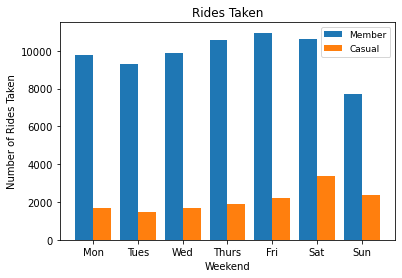

In [16]:
days = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
x_axis = np.arange(len(days)) + 1
plt.bar(member["weekday"] - 0.2, member["ride_length"], label = "Member", width = 0.4)
plt.bar(casual["weekday"] + 0.2, casual["ride_length"], label = "Casual", width = 0.4)
plt.title("Rides Taken")
plt.xlabel("Weekend")
plt.ylabel("Number of Rides Taken")
plt.xticks(x_axis, days)
plt.legend(loc = 1, prop = {'size': 9})
plt.show()

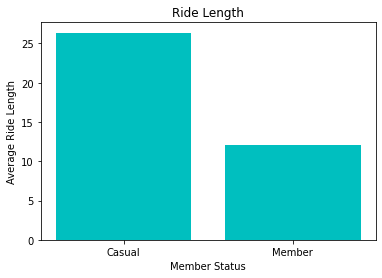

In [17]:
plt.bar([1, 2], ride_length_avg["ride_length"], color = "c")
plt.xticks([1, 2], ["Casual", "Member"])
plt.title("Ride Length")
plt.xlabel("Member Status")
plt.ylabel("Average Ride Length")
plt.show()

From the graphs and data frame of the mean ride lengths, we can see that Friday to Sunday are the most popular weekday for casuals to buy rides while Thursday to Saturday are the most popular weekays for members to buy rider. We can see that members take rides 5 times more than casual riders but casual riders take a longer average ride length while member riders take a almost half of casual riders' average ride length. We can deduct from this that casual riders typically take longer rides and don't often take rides while member riders take shorter rides and often take rides. This highlights the different behaviors in members and casuals so we would need to find a way to incentive casuals to use the bikes more often. For this, we will explore the stations and ride types.

In [18]:
ride_type_member = M01_member.groupby("rideable_type")[["ride_length"]].count().reset_index()
ride_type_member

,rideable_type,ride_length
0,classic_bike,53193
1,docked_bike,1
2,electric_bike,15625


In [19]:
ride_type_casual = M01_casual.groupby("rideable_type")[["ride_length"]].count().reset_index()
ride_type_casual

,rideable_type,ride_length
0,classic_bike,8221
1,docked_bike,2105
2,electric_bike,4364


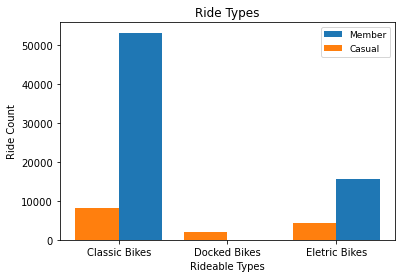

In [20]:
plt.bar([0.2, 1.2, 2.2], ride_type_member["ride_length"], label = "Member", width = 0.4)
plt.bar([-0.2, 0.8, 1.8], ride_type_casual["ride_length"], label = "Casual", width = 0.4)
plt.title("Ride Types")
plt.xlabel("Rideable Types")
plt.ylabel("Ride Count")
plt.xticks([0, 1, 2], ["Classic Bikes", "Docked Bikes", "Eletric Bikes"])
plt.legend(loc = 1, prop = {'size': 9})
plt.show()

This bar graph demonstrates the more common rideable types for bukes between the members and the casuals. We can see that the classic bike is the most popular for both members and casuals as they have the highest count. The least used seems to be the docked bike. Judging from this data, we can get rid of the docked bike and focus on adding more or improving classic bike and eletric bike.

In [21]:
casual_end_station = M01_casual.groupby("end_station_name")[["ride_length"]].count().reset_index()
casual_end_station.sort_values(by = ["ride_length"], inplace = True, ascending = False)
casual_end_station = casual_end_station[casual_end_station["ride_length"] > 100]

In [22]:
casual_start_station = M01_casual.groupby("start_station_name")[["ride_length"]].count().reset_index()
casual_start_station.sort_values(by = ["ride_length"], inplace = True, ascending = False)
casual_start_station = casual_start_station[casual_start_station["ride_length"] > 100]

In [23]:
member_end_station = M01_member.groupby("end_station_name")[["ride_length"]].count().reset_index()
member_end_station.sort_values(by = ["ride_length"], inplace = True, ascending = False)
member_end_station = member_end_station[member_end_station["ride_length"] > 500]

In [24]:
member_start_station = M01_member.groupby("start_station_name")[["ride_length"]].count().reset_index()
member_start_station.sort_values(by = ["ride_length"], inplace = True, ascending = False)
member_start_station = member_start_station[member_start_station["ride_length"] > 500]

In [25]:
def same_string(x1, x2):
    strings = []
    for i in x1:
        for n in x2:
            if i == n:
                strings.append(i)
    return strings

In [26]:
same_string(casual_end_station["end_station_name"], member_end_station["end_station_name"])

['Wells St & Elm St',
 'Clark St & Elm St',
 'Wells St & Concord Ln',
 'Dearborn St & Erie St',
 'Wabash Ave & Grand Ave']

In [27]:
same_string(casual_start_station["start_station_name"], member_start_station["start_station_name"])

['Wells St & Elm St',
 'Clark St & Elm St',
 'Wells St & Huron St',
 'Dearborn St & Erie St',
 'Kingsbury St & Kinzie St',
 'Wells St & Concord Ln']

These are the stations casuals and members have in common, as well as the most active ones used between the status of the people. 

## Conclusion

After analyzing the similarities and differences in both members and casuals,  my analysis is that the company should offer more classic and electric bikes at the most commonly shared stations such as Wells St & Elm St and Clark St & Elm St. Through this, we can hopefully see that the casuals would take more rides, incentiving them to take more rides which will further incentive them to become members. 